# Working with text

[Reading in Text](#reading_text)

[Counting Text](#counting)

[Revisiting Pandas](#pands)

This Lecture will focus on manipulating text. We will read in text from a file, do some simple text analysis, and output the results to plots and a file. We usually start by importing the packages we need.<ul><li>__from__ ... __import__ only takes a subset of functions from a package.</li>
<li>__import__ ... __as__ renames the package within the context of our code.</li></ul>
The example text was extracted from a PDF using the PDFMiner.six package (a fork of the main PDFMiner package). We will not cover that conversion in this lecture, but ask us for more information if you are interested.

In [1]:
import os
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <a name="reading_text">Reading in Text
Let's open a text file and read its contents. We will specify the name of the file without an extension as a variable for later use.

In [2]:
filename = 'weo-april-2017'

First we open the file, then we use the __readlines__ method to split the file into lines, each line an element in a list. Don't forget to closet the file to free up memory.

In [3]:
infile = open(filename + '.txt', encoding='utf-8')
lines = infile.readlines()
infile.close()

We can also rewrite the above code using the "with as" construct. This is because the __open__ function passes an object with an __\_\_enter\_\___ and __\_\_exit\_\___ functions. In this case, __\_\_exit\_\___ calls file.close() so we don't have to.

In [4]:
with open(filename + '.txt', encoding='utf-8') as infile:
    lines = infile.readlines()

Because of the way the file is formatted and how readlines works, a newline '\n' character shows up at the end of each line that must be removed, otherwise the letter 'n' will be over-represented. Note that the square brackets [] returns a list from the enclosed __for__ loop.

In [6]:
lines = [line.replace('\n','') for line in lines]

The total number of lines we have is just the length of our list. Print takes a string as input, so we use the __str__ function to convert the number returned from __len__.

In [7]:
print('Total lines: ' + str(len(lines)))

Total lines: 66696



In [8]:
print(lines[5])

Gaining Momentum?


## <a name="counting">Counting Text
Let's set up a dictionary (__dict__ function or curly brackets {}) to count the occurrance of each word in the document. The __if__ ... __in__ returns true only if the dictionary already contains that key entry.

In [9]:
counter_words = {}
counter_words = dict() #same effect as line above

for line in lines:
    words = line.split() #split lines into words
    for word in words:
        if word in counter_words:
            counter_words[word] += 1
        else:
            counter_words[word] = 1

print('Total words: ' + str(sum(counter_words.values())))
print('Total unique words: ' + str(len(counter_words)))

Total words: 156755
Total unique words: 18959


In [15]:
print(counter_words['Brazil'])
print(counter_words)

22
{'Brazil),': 1, '223–50.': 1, 'standardized': 2, 'Cooperation': 3, 'prediction.': 1, '9Data': 1, 'MA:': 4, 'Cover': 1, 'Natural': 6, 'Suk-': 1, 'Chile:': 1, 'extractive': 2, '“Get': 1, '88.7': 1, 'IEA': 4, 'deepening': 13, '(0.0657)': 1, 'prisingly,': 1, 'West': 12, 'expanding': 5, 'Database': 3, '(0.043)': 1, '2.39': 1, '2017).10': 1, 'accelerate': 5, 'AGS,': 1, 'There-': 1, 'nization': 2, 'Aged': 1, 'Rates': 18, 'Lledó,': 1, 'CONTENTS': 4, '550.3': 1, '354.3': 1, 'environment—the': 1, 'PER': 4, 'omies': 12, 'perception-based': 2, 'peaking': 1, 'P.L.C.,': 1, '3.': 39, 'sufficient,': 1, 'squares—that': 1, '–1.75': 1, 'commodities': 8, 'SNA)': 1, 'complex': 9, 'strengthening': 14, 'cope': 4, 'productivity.54': 1, 'concluded': 1, 'indicated': 6, '–62.7': 2, 'concentrated': 8, '–14.8': 7, 'AEI': 1, 'level;': 1, '–38.2': 2, 'marks': 2, '(1).': 1, '“clean”': 1, '27A': 1, '–672.5': 1, 'as': 645, 'Oil': 100, 'transactions': 2, 'BGR': 1, 'nal': 10, 'Analyzing': 2, '23.8': 8, 'ited': 1, '200

__Counter__ wraps some functionality around a dictionary to make it easier to use as a counter. The __update__ method easily counts characters in a string or words in a list, and notice we no longer need the if statement to add new elements.

In [16]:
counter_chars = Counter()
counter_lowchars = Counter()
counter_words = Counter()

for line in lines:
    counter_chars.update(line)
    
    words = line.split()
    counter_words.update(words)
    
    for char in line:
        lowchar = char.lower()
        if lowchar in string.ascii_lowercase:
            counter_lowchars.update(lowchar)
            
print('Total chars: ' + str(sum(counter_chars.values())))
print('Total unique chars: ' + str(len(counter_chars)))
print('Total unique words: ' + str(len(counter_words)))

Total chars: 916546
Total unique chars: 154
Total unique words: 18959


Here __Counter.most_common__ returns the character and its count in (char,num), in order from highest to lowest count. The __enumerate__ function adds the rank by simply counting up for each element, where we specified 1 as the starting number.

In [17]:
for rank, (char, num) in enumerate(counter_chars.most_common(),1):
    print("{:3d}".format(rank) + '    "' + char + '"    ' + "{:8d}".format(num))

print('-' * 80)

  1    " "      118986
  2    "e"       74365
  3    "a"       53098
  4    "t"       51796
  5    "n"       51538
  6    "i"       49904
  7    "o"       48753
  8    "r"       42139
  9    "s"       37036
 10    "."       27659
 11    "l"       26308
 12    "c"       25874
 13    "d"       22763
 14    "h"       19195
 15    "0"       16029
 16    "u"       15895
 17    "m"       15208
 18    "1"       15099
 19    "p"       13769
 20    "g"       13125
 21    "f"       12447
 22    "2"       12344
 23    "b"        8089
 24    "y"        7632
 25    ","        7606
 26    "v"        7238
 27    "3"        6497
 28    "5"        5889
 29    "w"        5863
 30    "–"        5812
 31    "4"        5521
 32    "6"        4929
 33    "9"        4640
 34    "7"        4477
 35    "8"        3922
 36    "E"        3872
 37    "A"        3828
 38    "C"        3762
 39    "S"        3553
 40    "I"        3355
 41    "M"        3261
 42    "x"        3208
 43    "T"        3107
 44    "-" 

If you look back at our counting loop, we have a separate counter where we first converted upper case to lower case and only counted letters (not symbols, spaces, etc).

In [18]:
for rank, (char, num) in enumerate(counter_lowchars.most_common(),1):
    print("{:3d}".format(rank) + '    "' + char + '"    ' + "{:8d}".format(num))

  1    "e"       78237
  2    "a"       56926
  3    "t"       54903
  4    "n"       54225
  5    "i"       53259
  6    "o"       51720
  7    "r"       44229
  8    "s"       40589
  9    "c"       29636
 10    "l"       27862
 11    "d"       25085
 12    "h"       19842
 13    "m"       18469
 14    "u"       17182
 15    "p"       16441
 16    "g"       15307
 17    "f"       14863
 18    "b"        9839
 19    "y"        7867
 20    "v"        7536
 21    "w"        6912
 22    "k"        3517
 23    "x"        3280
 24    "j"        1110
 25    "z"         964
 26    "q"         515


In the counting loop, the .split() function cut lines into lists of words and we counted those as well. Note that we didn't check for things like numbers or symbols.

In [19]:
for rank, (word, num) in enumerate(counter_words.most_common(50),1):
    print("{:3d}".format(rank) + '    "' + word.ljust(20) + '"    ' + "{:8d}".format(num))

  1    "the                 "        5387
  2    "and                 "        4326
  3    "of                  "        4153
  4    "in                  "        3424
  5    "to                  "        1924
  6    ".                   "        1759
  7    "a                   "        1471
  8    "for                 "        1043
  9    "is                  "         957
 10    "are                 "         801
 11    "0                   "         765
 12    "The                 "         733
 13    "on                  "         670
 14    "as                  "         645
 15    "with                "         645
 16    "by                  "         633
 17    "that                "         616
 18    "1                   "         555
 19    "*                   "         550
 20    "growth              "         531
 21    "2016                "         500
 22    "labor               "         496
 23    "2017                "         478
 24    "from                "     

Calling __string.ascii_lowercase__ gives us the letters in alphabetical order and we use that to re-order our counters alphabetically

In [20]:
# List of alphabet chars in order
categories = list(string.ascii_lowercase)
# Create list of number of times each letter appeared, in alphabetical order
list_nums = []
for char in categories:
    list_nums.append(counter_lowchars[char])

Let's create a figure. We first create the figure and axis objects and then set their parameters before drawing the plot with __plt.show__. Note the __np.arange__ for "a range", not "arrange"... it just gives an evenly spaced grid.

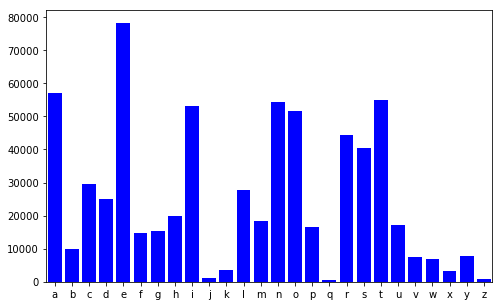

In [21]:
# Create figure
fig, ax = plt.subplots(1,1, figsize=(8,5))
rects = ax.bar(np.arange(len(categories)) + 0.5, list_nums, color='b', align='center')

ax.set_xticklabels(categories)

ax.set_xticks(np.arange(len(categories)) + 0.5)
ax.set_xlim(0,len(categories))

plt.show(fig)

__os.path.exists__ returns true if a directory or file with that name exists. If it doesn't exist, we then use __os.makedirs__ to create it as a directory.

In [22]:
if not os.path.exists('figures'):
    os.makedirs('figures')

It is now easy to save our figure in pdf format

In [23]:
fig.savefig('figures/lowchar_' + filename + '.pdf')

## <a name="pandas">Revisiting Pandas
For more complex analysis we could choose to tranform the data into a data frame using Pandas. The letters are takin in as indices (row labels) so we can sort the indices to get the alphabetical order. 

In [ ]:
df = pd.DataFrame.from_dict(counter_lowchars, orient='index')
df.sort_index(inplace=True)
df.columns = ['char count']
df

We also use the data frame to help with plotting

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

df.plot(kind='bar', color='red', ax=ax)

plt.show(fig)

In [ ]:
fig.savefig('figures/lowchar_pandas_' + filename + '.pdf')

Let's do the same data frame exercise with the word count instead of letters

In [ ]:
df = pd.DataFrame.from_dict(dict(counter_words.most_common(50)), orient='index')

In [ ]:
# Sort in order of words
df.columns = ['word count']
df.sort_values(by='word count', ascending=False, inplace=True)

In [ ]:
# Create plot
fig, ax = plt.subplots(1,1, figsize=(8,5))
fig.subplots_adjust(bottom=0.20)

df.plot(kind='bar', color='red', ax=ax)

plt.show()

In [ ]:
fig.savefig('figures/word_pandas_' + filename + '.pdf')

## Exercises
1. Define a set of words and remove them from the count. Typically "stop words" like the, a, which ...
2. Remove numbers from the word count
3. Remove stop words and numbers from the list of words itself